# K-means on a RGB colour space
- on Red channel
- on Red and Green channels

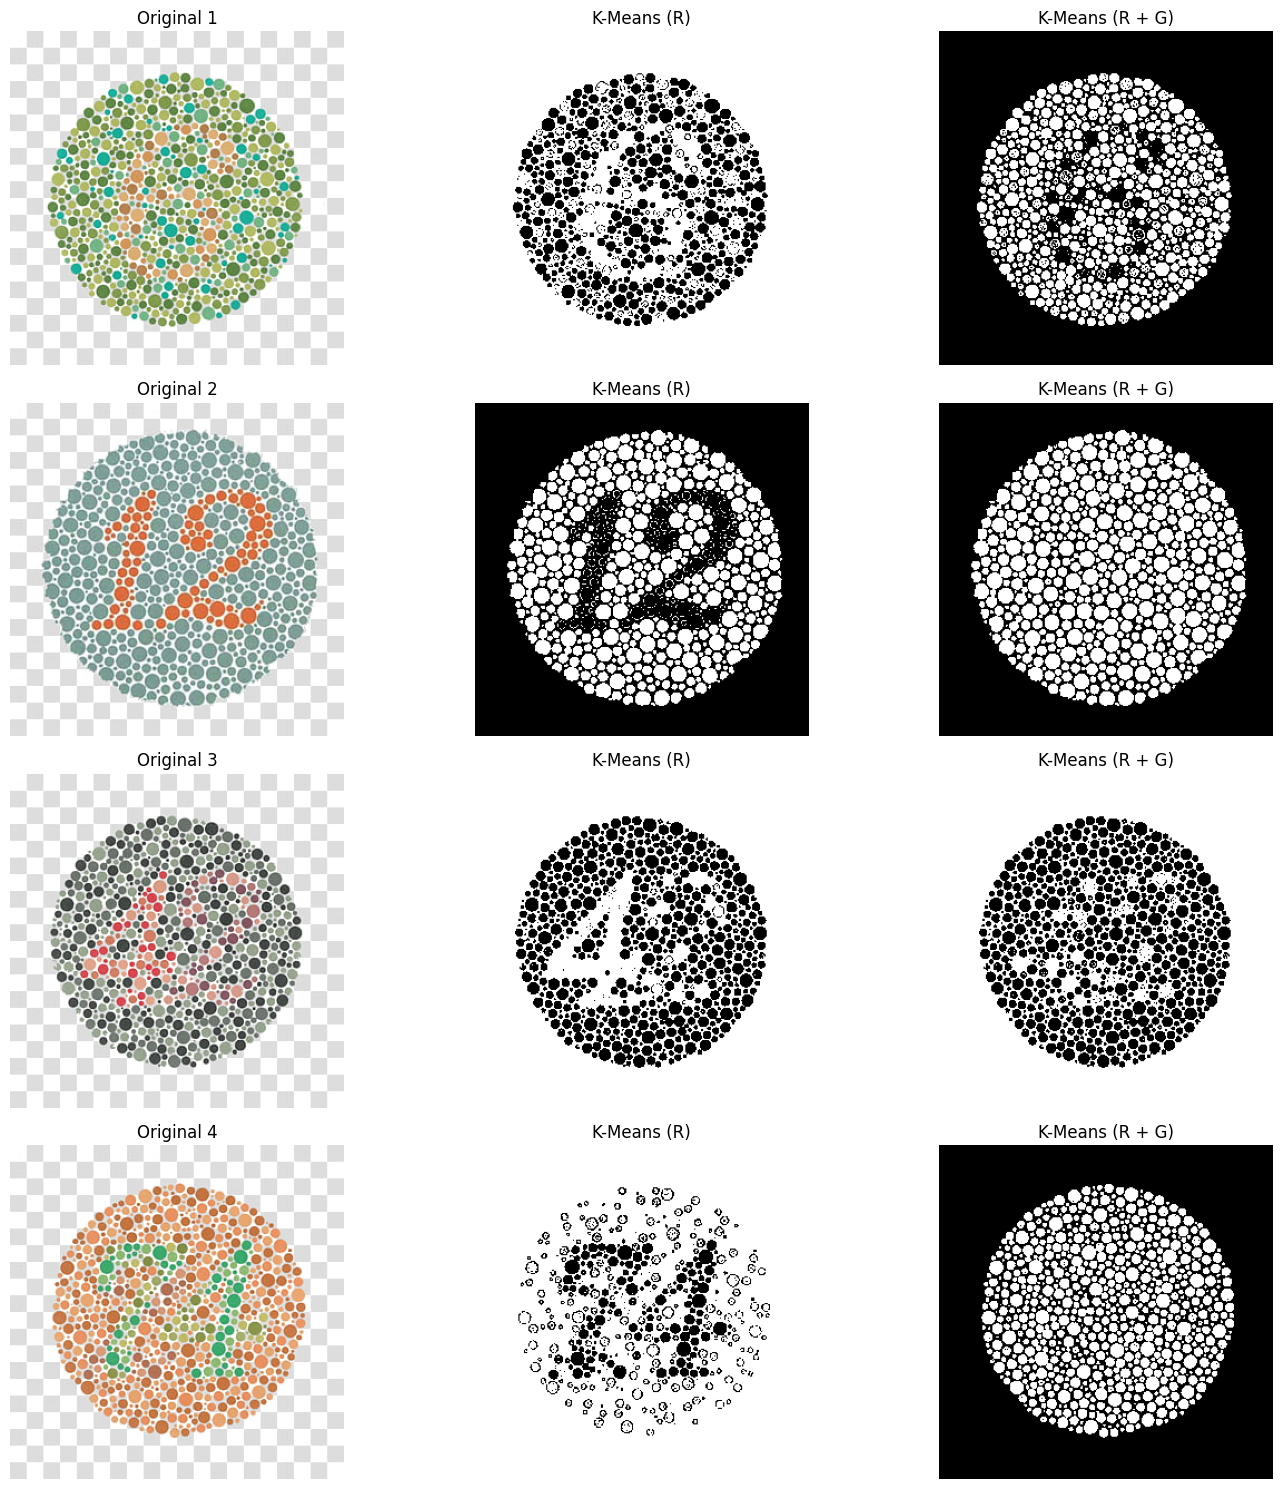

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List of image paths
image_paths = [
    '/content/drive/MyDrive/vision/6.jpg',
    '/content/drive/MyDrive/vision/12.jpg',
    '/content/drive/MyDrive/vision/42.jpg',
    '/content/drive/MyDrive/vision/74.jpg',
]

# Set up plot: 4 rows × 3 columns
plt.figure(figsize=(15, 15))

for idx, image_path in enumerate(image_paths):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found: {image_path}")
        continue
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # --- K-means on Red ---
    R = image_rgb[:, :, 0].reshape(-1, 1).astype(float)
    kmeans_r = KMeans(n_clusters=2, random_state=0, n_init=10)
    labels_r = kmeans_r.fit_predict(R)
    label_image_r = labels_r.reshape(image_rgb.shape[:2])

    # --- K-means on Red + Green ---
    RG = image_rgb[:, :, [0, 1]].reshape(-1, 2).astype(float)
    kmeans_rg = KMeans(n_clusters=2, random_state=0, n_init=10)
    labels_rg = kmeans_rg.fit_predict(RG)
    label_image_rg = labels_rg.reshape(image_rgb.shape[:2])

    # --- Plot the results (3 columns per image set) ---
    row = idx * 3
    plt.subplot(len(image_paths), 3, row + 1)
    plt.imshow(image_rgb)
    plt.title(f"Original {idx+1}")
    plt.axis("off")

    plt.subplot(len(image_paths), 3, row + 2)
    plt.imshow(label_image_r, cmap='gray')
    plt.title("K-Means (R)")
    plt.axis("off")

    plt.subplot(len(image_paths), 3, row + 3)
    plt.imshow(label_image_rg, cmap='gray')
    plt.title("K-Means (R + G)")
    plt.axis("off")

plt.tight_layout()
plt.show()


# K-means on a HSV colour space
- on Hue channel
- on Hue and Value channels

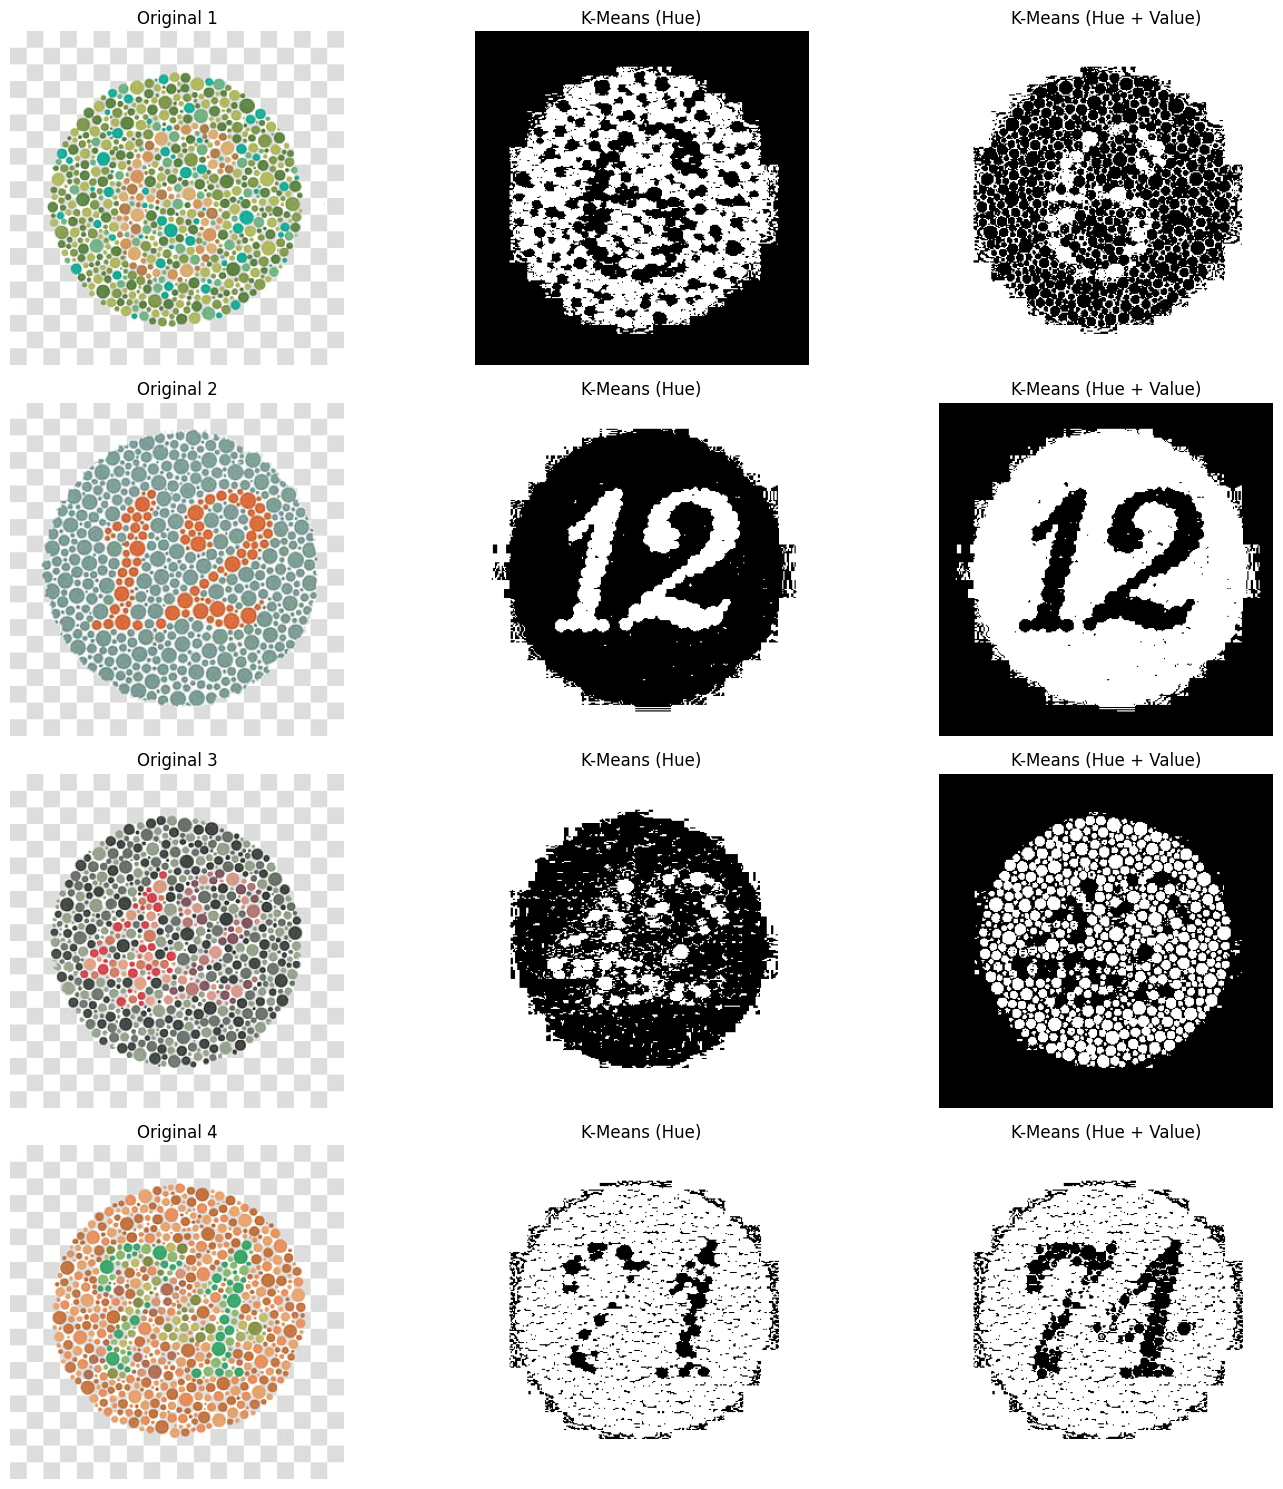

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List of image paths
image_paths = [
    '/content/drive/MyDrive/vision/6.jpg',
    '/content/drive/MyDrive/vision/12.jpg',
    '/content/drive/MyDrive/vision/42.jpg',
    '/content/drive/MyDrive/vision/74.jpg',
]

# Set up plot: 4 rows × 3 columns
plt.figure(figsize=(15, 15))

for idx, image_path in enumerate(image_paths):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found: {image_path}")
        continue
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # --- K-means on Hue only (H) ---
    H = hsv[:, :, 0].reshape(-1, 1).astype(float)
    kmeans_h = KMeans(n_clusters=2, random_state=0, n_init=10)
    labels_h = kmeans_h.fit_predict(H)
    label_image_h = labels_h.reshape(hsv.shape[:2])

    # --- K-means on Hue + Value (H + V) ---
    HV = hsv[:, :, [0, 2]].reshape(-1, 2).astype(float)
    kmeans_hv = KMeans(n_clusters=2, random_state=0, n_init=10)
    labels_hv = kmeans_hv.fit_predict(HV)
    label_image_hv = labels_hv.reshape(hsv.shape[:2])

    # --- Plot the results (3 columns per image set) ---
    row = idx * 3
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(len(image_paths), 3, row + 1)
    plt.imshow(image_rgb)
    plt.title(f"Original {idx+1}")
    plt.axis("off")

    plt.subplot(len(image_paths), 3, row + 2)
    plt.imshow(label_image_h, cmap='gray')
    plt.title("K-Means (Hue)")
    plt.axis("off")

    plt.subplot(len(image_paths), 3, row + 3)
    plt.imshow(label_image_hv, cmap='gray')
    plt.title("K-Means (Hue + Value)")
    plt.axis("off")

plt.tight_layout()
plt.show()


# K-means on Lab 'a' Channel (k=2 and k=3)

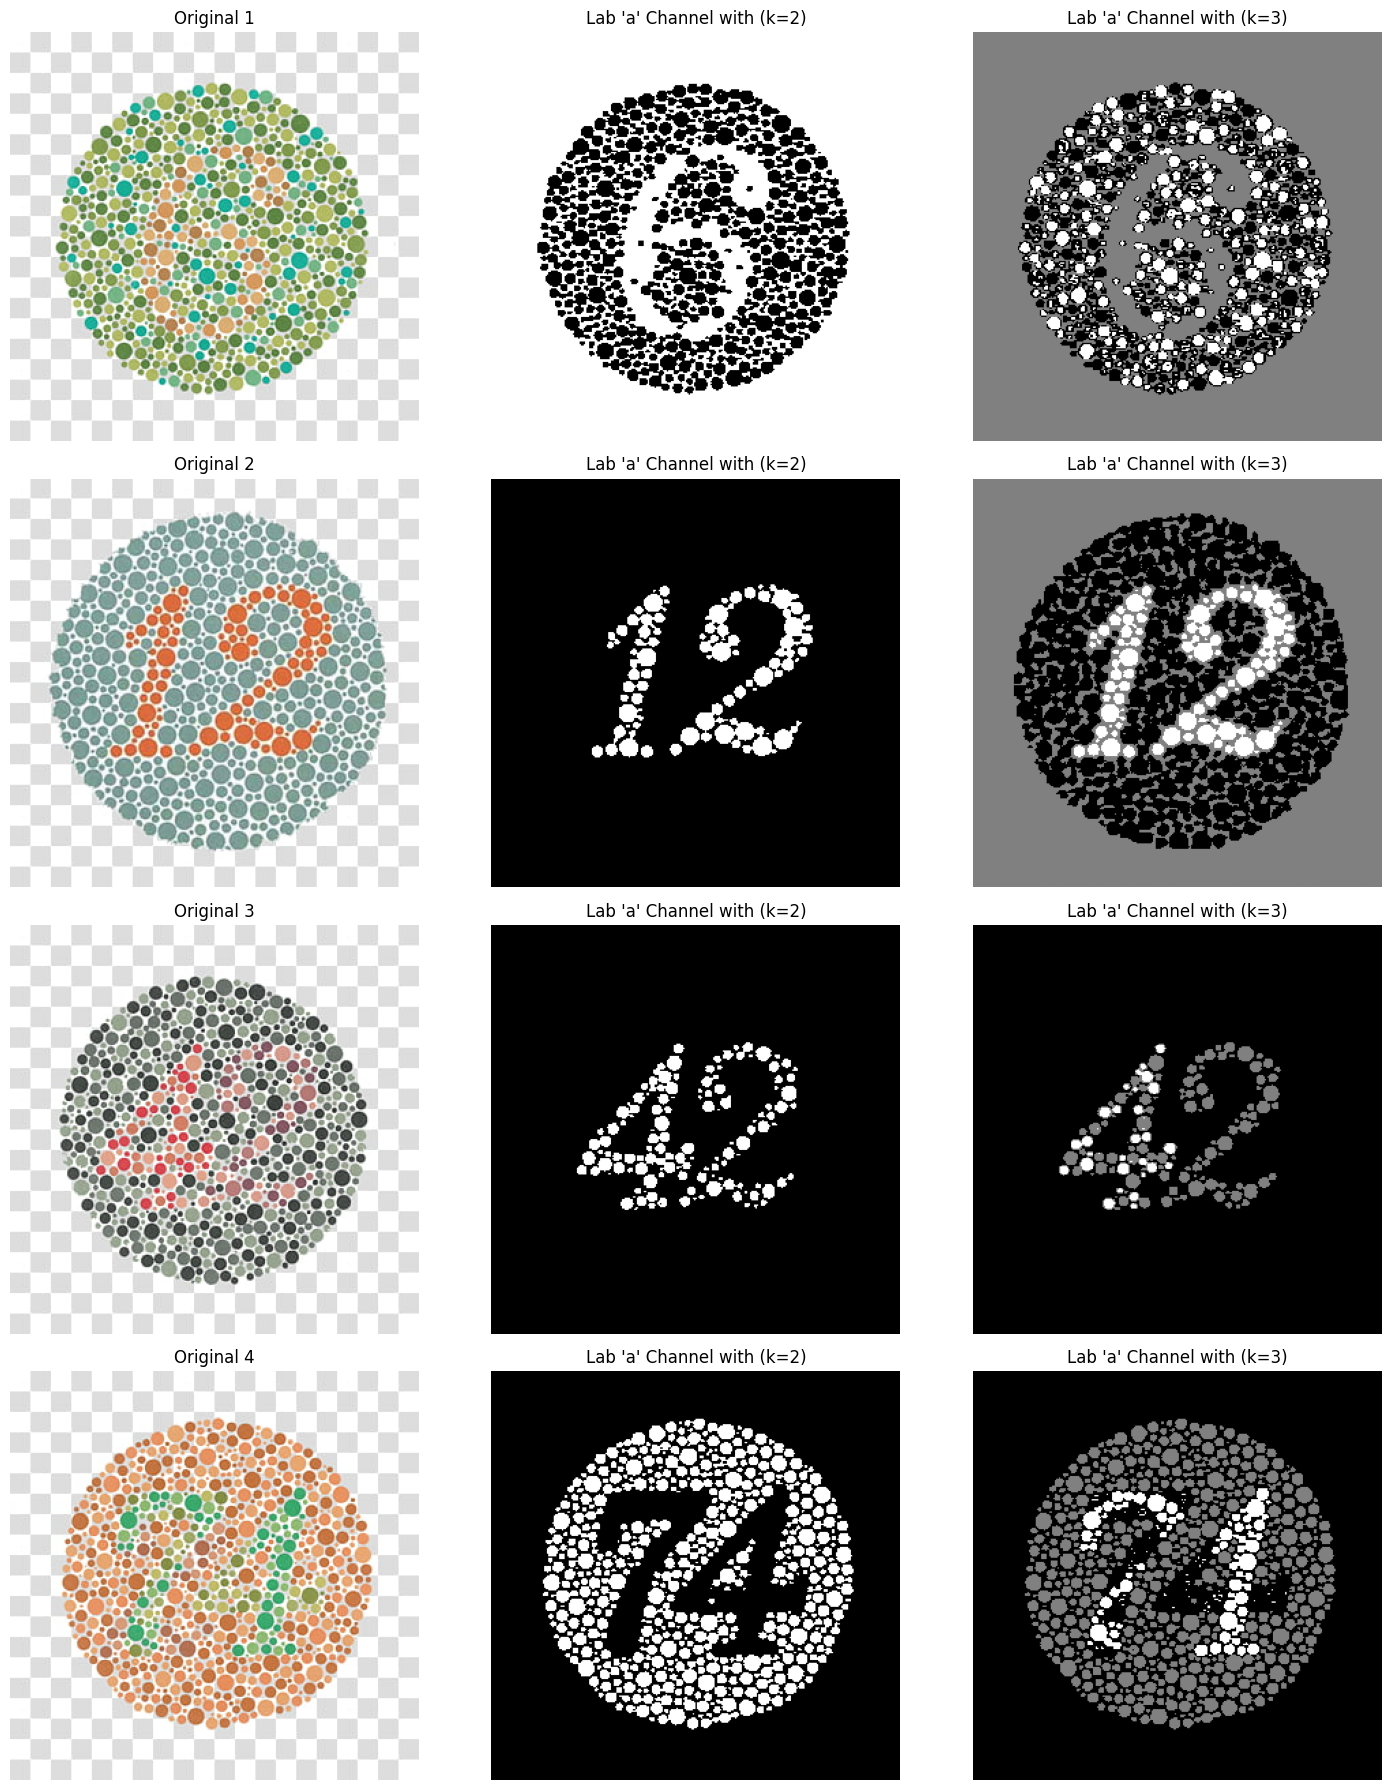

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List of image paths
image_paths = [
    '/content/drive/MyDrive/vision/6.jpg',
    '/content/drive/MyDrive/vision/12.jpg',
    '/content/drive/MyDrive/vision/42.jpg',
    '/content/drive/MyDrive/vision/74.jpg',
]

# Set up plot: 4 rows × 3 columns (Original, K=2, K=3)
plt.figure(figsize=(15, 18))

for idx, image_path in enumerate(image_paths):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found: {image_path}")
        continue

    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    a_channel = lab[:, :, 1].reshape(-1, 1).astype(float)  # Extract 'a' channel

    # K-means with k=2
    kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init=10)
    labels_2 = kmeans_2.fit_predict(a_channel)
    label_image_2 = labels_2.reshape(lab.shape[:2])

    # K-means with k=3
    kmeans_3 = KMeans(n_clusters=3, random_state=0, n_init=10)
    labels_3 = kmeans_3.fit_predict(a_channel)
    label_image_3 = labels_3.reshape(lab.shape[:2])

    # Convert original to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot Original, K=2, K=3
    row = idx * 3
    plt.subplot(len(image_paths), 3, row + 1)
    plt.imshow(image_rgb)
    plt.title(f"Original {idx+1}")
    plt.axis("off")

    plt.subplot(len(image_paths), 3, row + 2)
    plt.imshow(label_image_2, cmap='gray')
    plt.title("Lab 'a' Channel with (k=2)")
    plt.axis("off")

    plt.subplot(len(image_paths), 3, row + 3)
    plt.imshow(label_image_3, cmap='gray')
    plt.title("Lab 'a' Channel with (k=3)")
    plt.axis("off")

plt.tight_layout()
plt.show()


# YCrCb color space on Cr channel with k=2

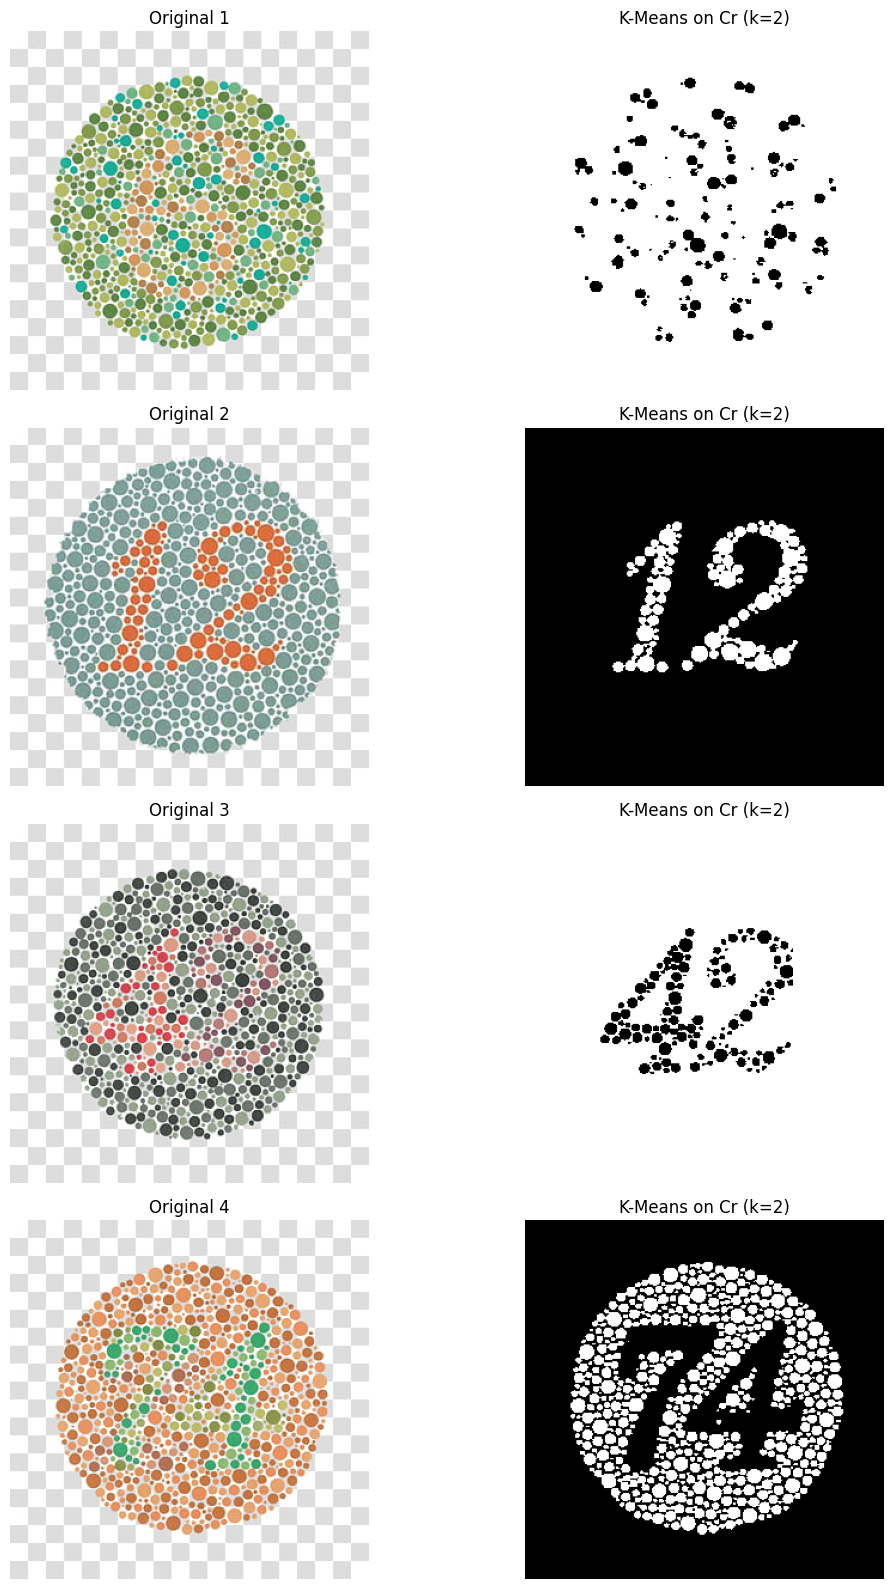

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List of image paths
image_paths = [
    '/content/drive/MyDrive/vision/6.jpg',
    '/content/drive/MyDrive/vision/12.jpg',
    '/content/drive/MyDrive/vision/42.jpg',
    '/content/drive/MyDrive/vision/74.jpg',
]

# Set up plot: 4 rows × 2 columns (Original, Cr k=2)
plt.figure(figsize=(12, 16))

for idx, image_path in enumerate(image_paths):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found: {image_path}")
        continue

    # Convert to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    cr_channel = ycrcb[:, :, 1].reshape(-1, 1).astype(float)  # Extract Cr channel

    # Apply K-means (k=2)
    kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
    labels = kmeans.fit_predict(cr_channel)
    label_image = labels.reshape(ycrcb.shape[:2])

    # Convert to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot original and clustered result
    row = idx * 2
    plt.subplot(len(image_paths), 2, row + 1)
    plt.imshow(image_rgb)
    plt.title(f"Original {idx+1}")
    plt.axis("off")

    plt.subplot(len(image_paths), 2, row + 2)
    plt.imshow(label_image, cmap='gray')
    plt.title("K-Means on Cr (k=2)")
    plt.axis("off")

plt.tight_layout()
plt.show()
